In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# dataset
df = pd.read_csv('../data/raw/European_Ski_Resorts.csv')

# Removing "no report"

In [3]:
df['Snowparks'] = df['Snowparks'].astype(str)

# rows where 'Snowparks' is 'no report' 
no_report = df[df['Snowparks'].str.strip().str.lower() == 'no report']
no_report[['Resort', 'Country', 'Snowparks']]

,Resort,Country,Snowparks
216,Dry slopes Dayz Søhøjlandets Skicenter,Denmark,no report
217,Indoor ski area Skidome Denmark – Randers (pla...,Denmark,no report
218,Dry slopes Indoorski – Rødovre,Denmark,no report
219,Dry slopes Ski Arena – Aarhus,Denmark,no report
220,Copenhagen (planned),Denmark,no report
221,Østerlars (Bornholm),Denmark,no report
222,Hoch Hylkedal – Kolding,Denmark,no report
341,Hedelands Skicenter,Denmark,no report


In [4]:
# dropping 'no report'
df.drop(df[df['Snowparks'].str.strip().str.lower() == 'no report'].index, inplace=True)

In [5]:
# verifying 'no report' was dropped
print(df['Snowparks'].unique())

['Yes' 'No']


# Converting Columns to numerical values


In [6]:
# Converting 'NightSki' and 'Snowparks' columns to numerical values
df['NightSki'] = df['NightSki'].map({'Yes':1, 'No':0})
df['Snowparks'] = df['Snowparks'].map({'Yes':1, 'No':0})

In [7]:
# verify
print(df['Snowparks'].unique())

[1 0]


In [8]:
print(df['NightSki'].unique())

[0 1]


# Removing Column


In [9]:
df.head()

,#,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,1,0,22,16,11,49,75398,600
1,2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,1,1,37,28,7,72,99017,1032
2,3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,0,0,2,0,0,2,1932,0
3,4,Dachstein West,Austria,1620,780,42,15,33,3,51,1,1,25,8,3,36,32938,163
4,5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,1,0,6,11,10,27,49228,450


In [10]:
# removing '#' column
df = df.drop(['#', 'Resort'], axis=1)

In [11]:
df.head()

,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,Austria,1980,740,52,30,81,4,115,1,0,22,16,11,49,75398,600
1,Andorra,2640,1710,47,100,77,33,210,1,1,37,28,7,72,99017,1032
2,Austria,1130,900,30,1,0,1,2,0,0,2,0,0,2,1932,0
3,Austria,1620,780,42,15,33,3,51,1,1,25,8,3,36,32938,163
4,Southern Russia,2320,940,22,30,26,21,77,1,0,6,11,10,27,49228,450


# NightSki and Snow parks

In [12]:
# NightSki and SnowParks by country 
night_ski_country = df.groupby('Country')['NightSki'].sum()
snow_parks_country = df.groupby('Country')['Snowparks'].sum()

In [13]:
# most and the least NightSki
max_night_country = night_ski_country.idxmax()
max_night_ski = night_ski_country.max()

least_night_country = night_ski_country.idxmin()
least_night_ski = night_ski_country.min()

print(f'Country with the most Night Skiing resorts: {max_night_country} with {max_night_ski} resorts.')
print(f'Country with the least Night Skiing resorts: {least_night_country} with {least_night_ski} resorts.')

Country with the most Night Skiing resorts: Austria with 32 resorts.
Country with the least Night Skiing resorts: Greece with 0 resorts.


In [14]:
night_ski_country = night_ski_country.sort_values(ascending=False)
night_ski_country

Country
Austria                   32
France                    31
Switzerland               21
Italy                     17
Germany                   13
Norway                     7
Bulgaria                   4
Sweden                     4
Andorra                    3
Finland                    3
Slovakia                   2
Slovenia                   2
Spain                      2
Czech Republic             2
United Kingdom             1
Bosnia and Herzegovina     1
Lithuania                  1
Netherlands                1
Poland                     1
Romania                    1
Serbia                     1
Ukraine                    1
Southern Russia            1
Greece                     0
Liechtenstein              0
Siberia                    0
Name: NightSki, dtype: int64

In [15]:
# most and the least Snow Parks
max_snowparks_country = snow_parks_country.idxmax()
max_snow_parks = snow_parks_country.max()

least_snowparks_country = snow_parks_country.idxmin()
least_snow_parks = snow_parks_country.min()

print(f'Country with the most Snow Parks: {max_snowparks_country} with {max_snow_parks} resorts.')
print(f'Country with the least Snow Parks: {least_night_country} with {least_snow_parks} resorts.')

Country with the most Snow Parks: Austria with 69 resorts.
Country with the least Snow Parks: Greece with 0 resorts.


In [16]:
snow_parks_country = snow_parks_country.sort_values(ascending=False)
snow_parks_country

Country
Austria                   69
France                    67
Switzerland               46
Italy                     37
Germany                   15
Norway                     9
Spain                      5
Andorra                    5
Slovakia                   4
Sweden                     4
Finland                    3
Bulgaria                   3
Czech Republic             2
United Kingdom             1
Liechtenstein              1
Lithuania                  1
Netherlands                1
Poland                     1
Ukraine                    1
Serbia                     1
Slovenia                   1
Southern Russia            1
Bosnia and Herzegovina     0
Greece                     0
Romania                    0
Siberia                    0
Name: Snowparks, dtype: int64

# Scatter and Box Plots

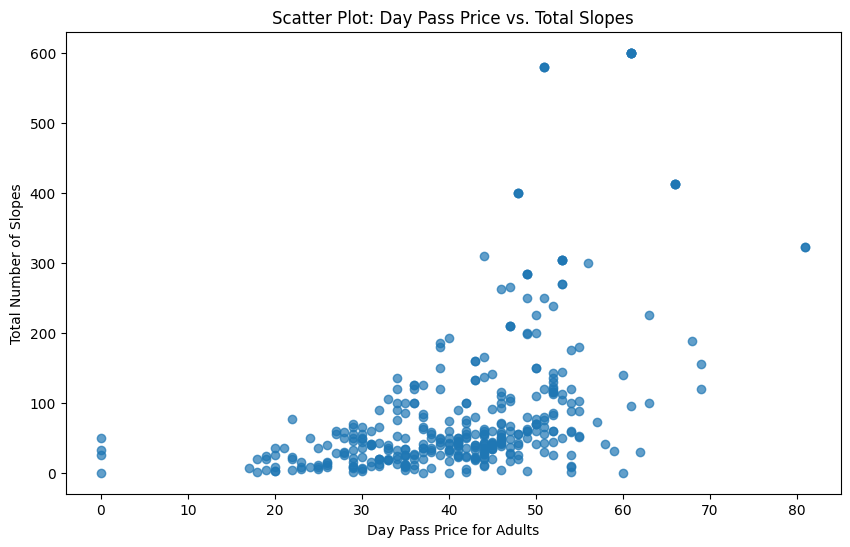

In [17]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['DayPassPriceAdult'], df['TotalSlope'], alpha=0.7)
# alpha - transparency of the points

plt.xlabel('Day Pass Price for Adults')
plt.ylabel('Total Number of Slopes')
plt.title('Scatter Plot: Day Pass Price vs. Total Slopes')

plt.show()

# we can use this for linear regression 

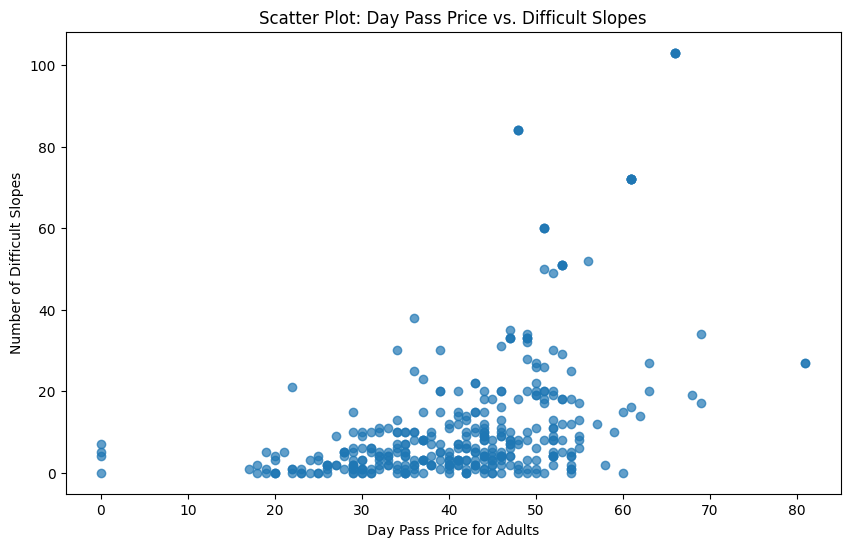

In [18]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['DayPassPriceAdult'], df['DifficultSlope'], alpha=0.7)

plt.xlabel('Day Pass Price for Adults')
plt.ylabel('Number of Difficult Slopes')
plt.title('Scatter Plot: Day Pass Price vs. Difficult Slopes')

plt.show()

C:\Users\salma\AppData\Local\Temp\ipykernel_18064\184433520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayPassPriceAdult', y='Country', data=df, palette='pastel')


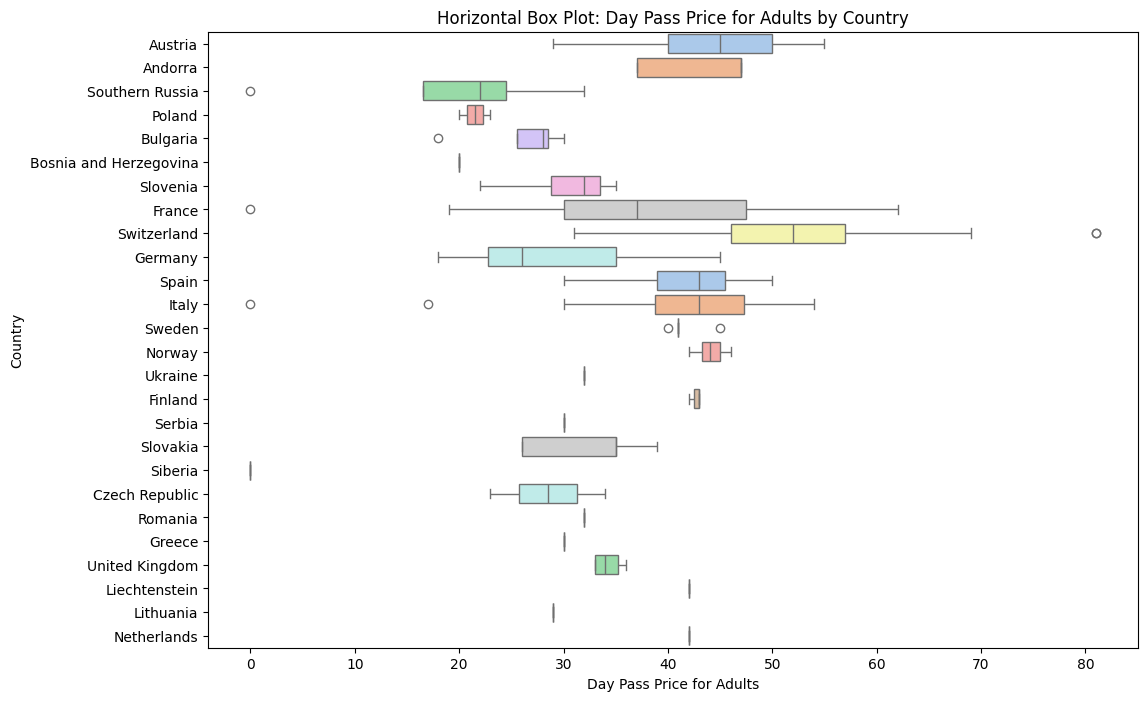

In [19]:
plt.figure(figsize=(12, 8))

# Horizontal box plot for DayPassPriceAdult
sns.boxplot(x='DayPassPriceAdult', y='Country', data=df, palette='pastel')
plt.xlabel('Day Pass Price for Adults')
plt.ylabel('Country')
plt.title('Horizontal Box Plot: Day Pass Price for Adults by Country')
# palette: https://seaborn.pydata.org/tutorial/color_palettes.html

plt.show()

In [20]:
# no variability? 
# netherlands, lithuania, liechtenstein, greece, romania, siberia, ukraine, bosnia and herzegovina

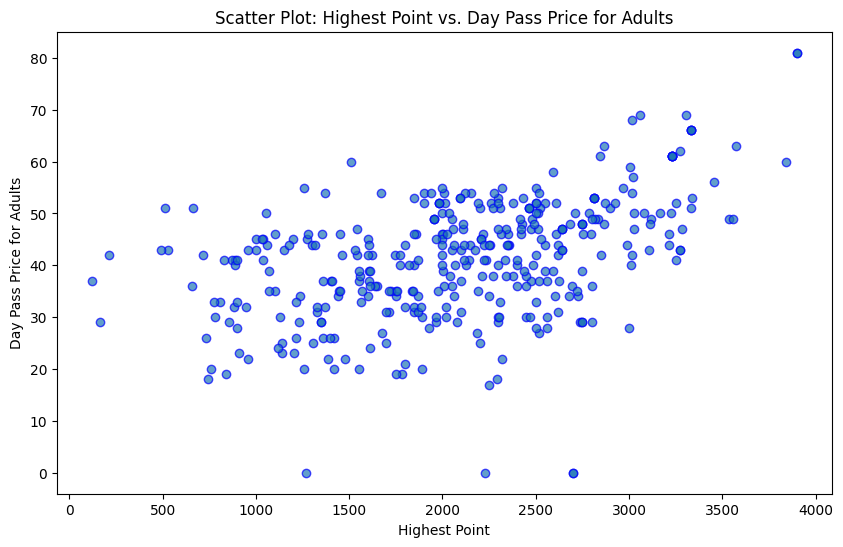

In [21]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['HighestPoint'], df['DayPassPriceAdult'], alpha=0.7, edgecolors='b')
# edgecolors = blue borders

plt.xlabel('Highest Point')
plt.ylabel('Day Pass Price for Adults')
plt.title('Scatter Plot: Highest Point vs. Day Pass Price for Adults')

plt.show()

# we can use this for linear regression 

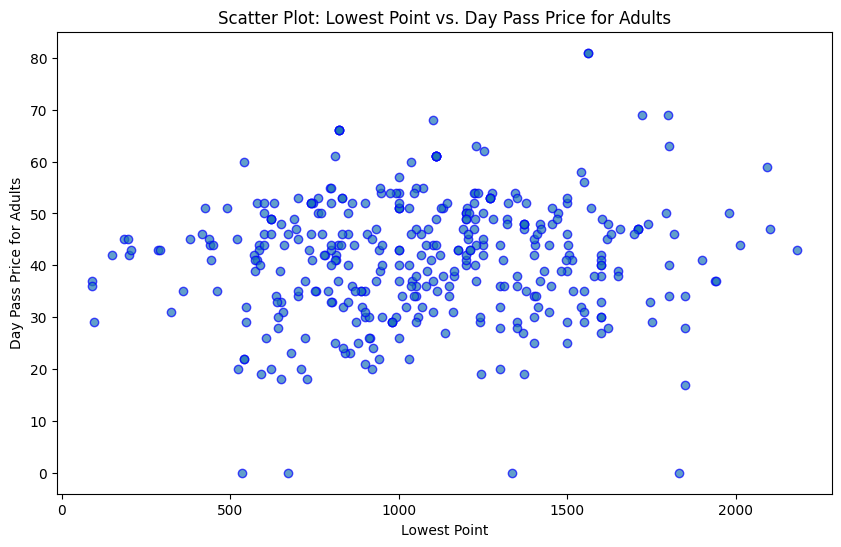

In [22]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['LowestPoint'], df['DayPassPriceAdult'], alpha=0.7, edgecolors='b')

plt.xlabel('Lowest Point')
plt.ylabel('Day Pass Price for Adults')
plt.title('Scatter Plot: Lowest Point vs. Day Pass Price for Adults')

plt.show()

# Heat Map and Distribution Plots of Resorts Interests

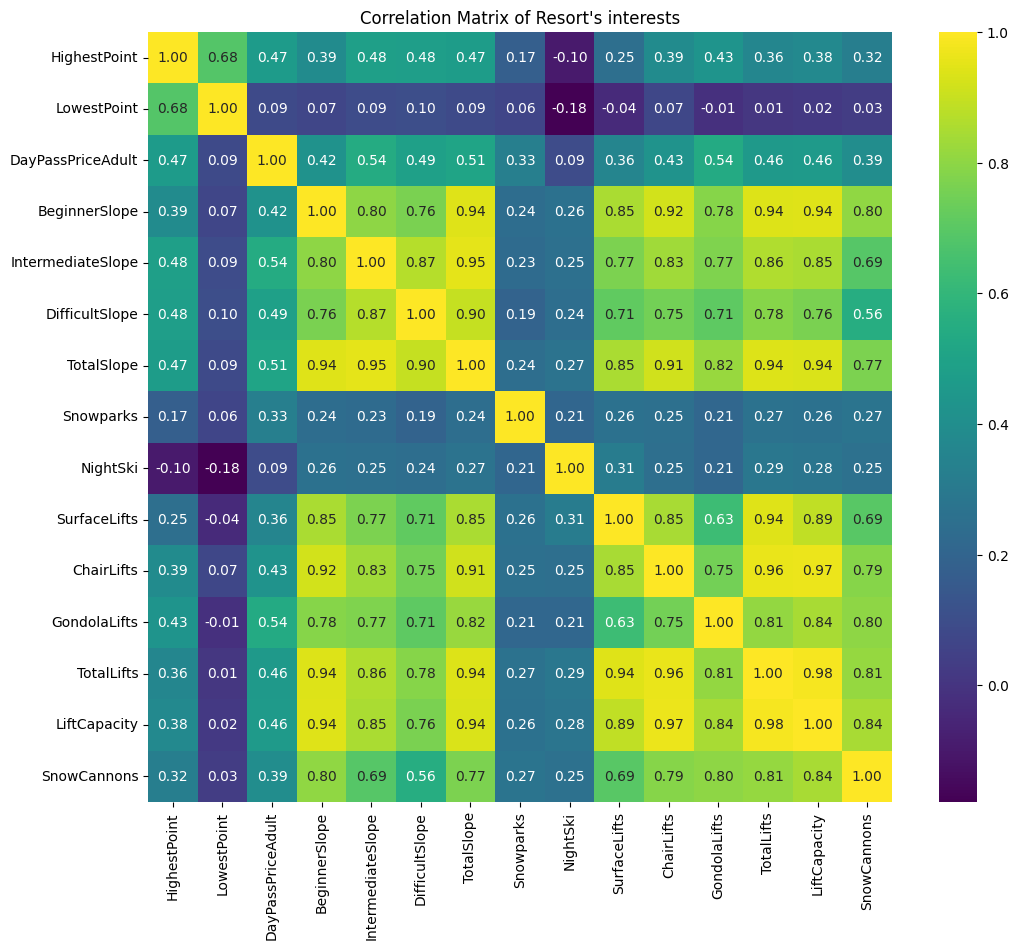

In [23]:
resort_interests = ['HighestPoint', 'LowestPoint', 'DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope',
                    'DifficultSlope', 'TotalSlope', 'Snowparks', 'NightSki', 'SurfaceLifts',
                    'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity', 'SnowCannons']

correlation_df = df[resort_interests]

# the correlation matrix
correlation_matrix = correlation_df.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
#annot; values in each cell
#fmt float formatting; 2 decimal places
plt.title('Correlation Matrix of Resort\'s interests')
plt.show()

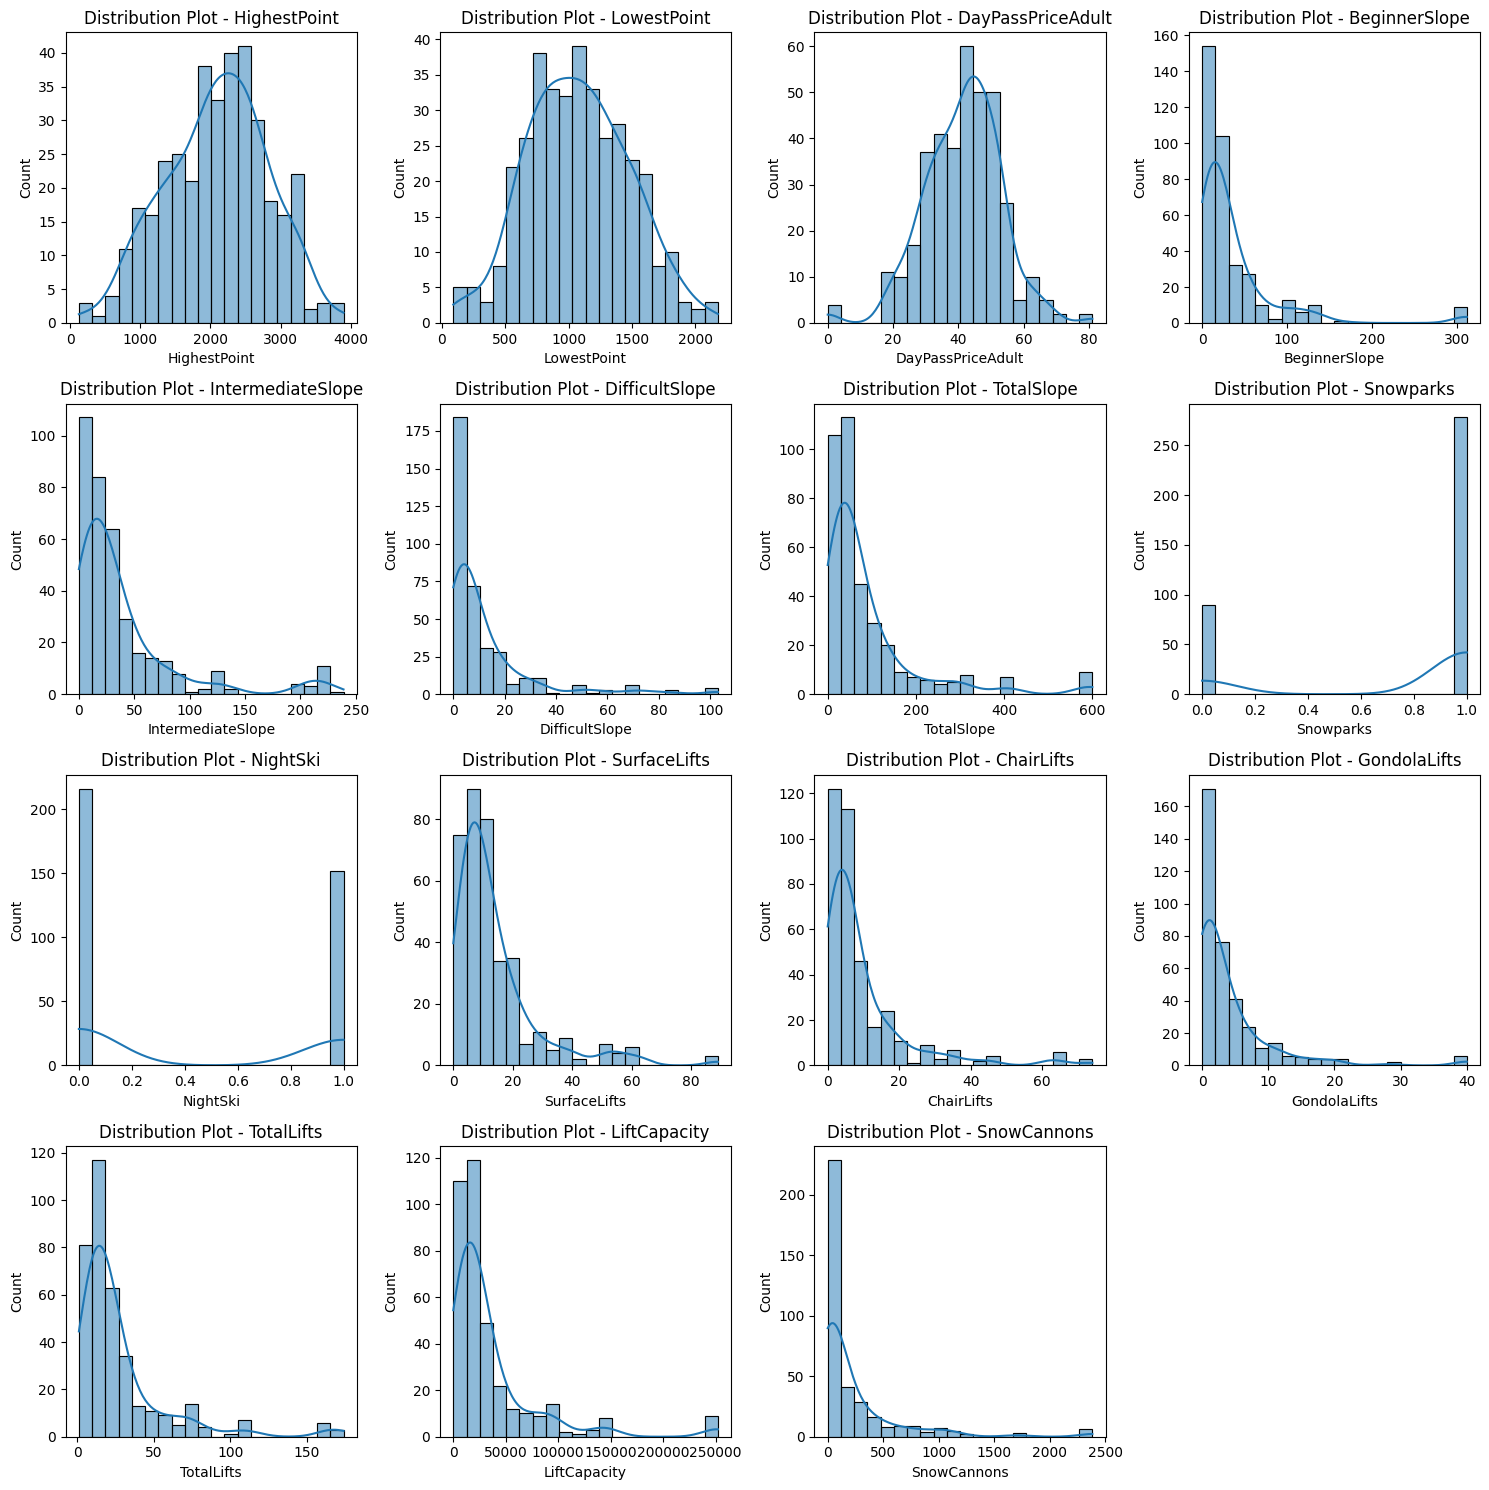

In [24]:
plt.figure(figsize=(15, 15))

# distribution plots for each interest
for i, column in enumerate(df[resort_interests].columns):
    # 4x4 grid
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df[column], kde=True, bins=20)
    plt.title(f'Distribution Plot - {column}')

# adjusting layout
plt.tight_layout()
plt.show()

# Cleaned data

In [25]:
df.to_csv("../data/processed/European_Ski_Resorts.csv", index=False)